In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 노트북 안에 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 gglot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumGothic'

### 픽셀 median

In [80]:
df_pixel = pd.read_csv("data/산수농장 2022-01-20 ~ 2022-02-18 (NAS).csv")
df_pixel.shape
df_pixel['CREATE_TIME'] = df_pixel['CREATE_TIME'].astype(str)
df_pixel['CREATE_TIME'] = pd.to_datetime(df_pixel['CREATE_TIME'])
df_pixel = df_pixel[(~(df_pixel['WEIGHT_PREDICTION_PIXEL_MEAN'] == '\\N'))]
df_pixel = df_pixel[~df_pixel['WEIGHT_PREDICTION_PIXEL_MEAN'].isnull()]

In [82]:
df_pixel['HOUSE_ID']

20       H02
21       H02
22       H02
23       H03
24       H03
        ... 
21952    H02
21954    H02
21973    H02
21982    H02
22003    H02
Name: HOUSE_ID, Length: 19015, dtype: object

In [71]:
def pixel_median(x):
    x = x.replace('[',"")
    x = x.replace(']',"")
    arr_list = list(map(int, x.split(",")))
    #result = round(sum(arr_list) / len(arr_list),1) # 중앙값
    result = np.median(np.array(arr_list))
    return result

df_pixel['PIXEL_MEDIAN'] = df_pixel['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(pixel_median)


df_pixel = df_pixel.groupby(pd.Grouper(key='CREATE_TIME', freq='6h')).median()
df_pixel = df_pixel.reset_index()

In [79]:
df_pixel['HOUSE_ID']

KeyError: 'HOUSE_ID'

### 체중계 median

In [51]:
# 데이터 로드
df_weight = pd.read_csv("data/산수농장 체중계 2022-01-20 ~ 2022-02-18 (NAS).csv")
df_weight.shape
df_weight['CREATE_TIME'] = df_weight['CREATE_TIME'].astype(str)
df_weight['CREATE_TIME'] = pd.to_datetime(df_weight['CREATE_TIME'])

In [52]:
df_weight = df_weight[df_weight['SENSOR_DATA'] > 10 ]

In [53]:
df_weight = df_weight.groupby(pd.Grouper(key='CREATE_TIME', freq='6h')).median()
df_weight = df_weight.reset_index()
df_weight

,CREATE_TIME,MODULE_ID,SENSOR_DATA,SENSOR_TIME,SENSOR_INFO
0,2022-01-20 06:00:00,30153.0,145.070,2.022012e+13,0.0
1,2022-01-20 12:00:00,30153.0,168.720,2.022012e+13,0.0
2,2022-01-20 18:00:00,30150.0,187.100,2.022012e+13,0.0
3,2022-01-21 00:00:00,30150.0,195.710,2.022012e+13,0.0
4,2022-01-21 06:00:00,30156.0,249.150,2.022012e+13,0.0
...,...,...,...,...,...
99,2022-02-14 00:00:00,30156.0,1482.655,2.022021e+13,0.0
100,2022-02-14 06:00:00,30156.0,1450.150,2.022021e+13,0.0
101,2022-02-14 12:00:00,30156.0,1531.680,2.022021e+13,0.0
102,2022-02-14 18:00:00,30156.0,1570.890,2.022021e+13,0.0


### 한 프레임 합치기

In [76]:
median_data = pd.merge(left=df_pixel, right=df_weight, how='inner', on='CREATE_TIME')[['CREATE_TIME','PIXEL_MEDIAN','SENSOR_DATA']]
median_data.columns = ['CREATE_TIME', 'medianPixel', 'medianWeight']


In [78]:
median_data.to_csv("median 산수농장.csv", mode='w')

### 비어있는 데이터 확인 후 합쳐서 csv 파일 만들기

In [3]:
data = pd.read_csv("data/막곡농장 2Cycle 2022-02-07 ~ 2022-03-09 (NAS).csv")
data.shape
data['CREATE_TIME'] = data['CREATE_TIME'].astype(str)
data['CREATE_TIME'] = pd.to_datetime(data['CREATE_TIME'])
data = data[(~(data['WEIGHT_PREDICTION_PIXEL_MEAN'] == '\\N'))]
data = data[~data['WEIGHT_PREDICTION_PIXEL_MEAN'].isnull()]
data

,TID,CREATE_TIME,FARM_ID,GATEWAY_ID,HOUSE_ID,MODULE_ID,DATA_TYPE,ORG_FILE_NAME,WEIGHT_PREDICTION_RESULT_FILE_NAME,WEIGHT_PREDICTION_COUNT,WEIGHT_PREDICTION_PIXEL_MEAN,WEIGHT_PREDICTION_WEIGHT,WEIGHT_PREDICTION_STATUS,FILE_SIZE
6,db0be50d4614,2022-02-09 17:36:35,FA0006,GW01,H03,"CT03,6",real,"FA0006_GW01_H03_CT03,6_20220209173635_farm_ima...","FA0006_GW01_H03_CT03,6_20220209173635_farm_ima...",1.0,[9577],3771.6,success,182140.0
791,f45ae6494d1d,2022-02-10 11:13:14,FA0006,GW01,H02,"CT02,3",real,"FA0006_GW01_H02_CT02,3_20220210111314_farm_ima...","FA0006_GW01_H02_CT02,3_20220210111314_farm_ima...",7.0,"[2717,2606,2872,2582,2696,2692,2702]",574.9,success,141646.0
792,60368ffd4ad1,2022-02-10 11:13:27,FA0006,GW01,H03,"CT03,3",real,"FA0006_GW01_H03_CT03,3_20220210111327_farm_ima...","FA0006_GW01_H03_CT03,3_20220210111327_farm_ima...",4.0,"[3325,3326,3329,3466]",716.9,success,172715.0
793,405f0c3a43ca,2022-02-10 11:13:39,FA0006,GW01,H04,"CT04,3",real,"FA0006_GW01_H04_CT04,3_20220210111339_farm_ima...","FA0006_GW01_H04_CT04,3_20220210111339_farm_ima...",3.0,"[3650,3993,3977]",862.9,success,133308.0
794,2918d3af4ebf,2022-02-10 11:13:43,FA0006,GW01,H01,"CT01,3",real,"FA0006_GW01_H01_CT01,3_20220210111343_farm_ima...","FA0006_GW01_H01_CT01,3_20220210111343_farm_ima...",3.0,"[2623,2699,2861]",575.6,success,154223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26820,bc47a94d4507,2022-03-08 22:56:19,FA0006,GW01,H02,"CT02,6",real,"FA0006_GW01_H02_CT02,6_20220308225619_farm_ima...","FA0006_GW01_H02_CT02,6_20220308225619_farm_ima...",6.0,"[11984,12843,13846,15089,13455,12986]",1195.6,success,57047.0
26824,0e9584a8411b,2022-03-08 23:03:15,FA0006,GW01,H02,"CT02,3",real,"FA0006_GW01_H02_CT02,3_20220308230315_farm_ima...","FA0006_GW01_H02_CT02,3_20220308230315_farm_ima...",1.0,[12405],1107.6,success,72676.0
26825,0c917954431c,2022-03-08 23:06:20,FA0006,GW01,H02,"CT02,6",real,"FA0006_GW01_H02_CT02,6_20220308230620_farm_ima...","FA0006_GW01_H02_CT02,6_20220308230620_farm_ima...",2.0,"[13272,13394]",1207.7,success,70645.0
26830,6d2c5bba4df6,2022-03-08 23:13:13,FA0006,GW01,H02,"CT02,3",real,"FA0006_GW01_H02_CT02,3_20220308231313_farm_ima...","FA0006_GW01_H02_CT02,3_20220308231313_farm_ima...",1.0,[12354],1102.1,success,71898.0


### 없는 데이터 합치기

In [16]:
data_pixel_2 = pd.read_csv("data/막곡 2022-02-10 _ 2022-02-14.csv")
data_pixel_2['CREATE_TIME'] = [x[4] for x in data_pixel_2['image_name'].str.split("_")]
data_pixel_2['MODULE_ID'] = [x[3] for x in data_pixel_2['image_name'].str.split("_")]
data_pixel_2['HOUSE_ID'] = [x[2] for x in data_pixel_2['image_name'].str.split("_")]
data_pixel_2['CREATE_TIME'] = pd.to_datetime(data_pixel_2.CREATE_TIME)
data_pixel_2 = data_pixel_2[(~(data_pixel_2['pixel_median'] == '\\N'))]
data_pixel_2 = data_pixel_2[~data_pixel_2['pixel_median'].isnull()]
data_pixel_2 = data_pixel_2[['CREATE_TIME', 'pixel_median', 'MODULE_ID', 'HOUSE_ID','pixel_list']]
#makgok_pixel_2.columns = ['CREATE_TIME', 'WEIGHT_PREDICTION_PIXEL_MEDIAN','MODULE_ID','HOUSE_ID']
data_pixel_2.columns = ['CREATE_TIME', 'WEIGHT_PREDICTION_PIXEL_MEDIAN','MODULE_ID','HOUSE_ID','WEIGHT_PREDICTION_PIXEL_MEAN']
data_pixel_2

,CREATE_TIME,WEIGHT_PREDICTION_PIXEL_MEDIAN,MODULE_ID,HOUSE_ID,WEIGHT_PREDICTION_PIXEL_MEAN
0,2022-02-11 02:36:47,3845.0,"CT03,6",H03,"[3344, 3964, 3726, 4290, 3967, 3358, 3527, 4026]"
1,2022-02-11 02:26:18,3012.0,"CT02,6",H02,"[3056, 2968]"
2,2022-02-11 02:43:54,3154.0,"CT01,3",H01,"[3411, 3154, 3069]"
3,2022-02-11 02:46:36,3529.0,"CT03,6",H03,"[3529, 4101, 3429, 3770, 3502]"
4,2022-02-11 02:47:28,3371.5,"CT01,6",H01,"[3382, 3361]"
...,...,...,...,...,...
3770,2022-02-14 01:36:18,3570.0,"CT02,6",H02,[3570]
3771,2022-02-14 01:36:53,4623.5,"CT03,6",H03,"[4491, 4632, 5027, 4612, 4615, 4647, 4996, 437..."
3772,2022-02-14 01:43:53,4656.0,"CT04,3",H04,"[4656, 4624, 4372, 4970, 4657]"
3773,2022-02-14 01:37:00,8413.0,"CT01,6",H01,[8413]


In [28]:
data = pd.concat([data,data_pixel_2])
data.to_csv("막곡농장 2cycle.csv", mode='w')

In [19]:
makgok_pixel_h01 = data[data['HOUSE_ID'] =='H01']
makgok_pixel_h02 = data[data['HOUSE_ID'] =='H02']
makgok_pixel_h03 = data[data['HOUSE_ID'] =='H03']
makgok_pixel_h04 = data[data['HOUSE_ID'] =='H04']

In [20]:
def remove_str(x):
    x = x.replace('[',"")
    x = x.replace(']',"")
    arr_list = list(map(int, x.split(",")))
    #result = round(sum(arr_list) / len(arr_list),1) # 중앙값
    return arr_list

makgok_pixel_h01['pixel'] = makgok_pixel_h01['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(remove_str)
makgok_pixel_h02['pixel'] = makgok_pixel_h02['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(remove_str)
makgok_pixel_h03['pixel'] = makgok_pixel_h03['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(remove_str)
makgok_pixel_h04['pixel'] = makgok_pixel_h04['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(remove_str)

<ipython-input-20-0fd612e06bbb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makgok_pixel_h01['pixel'] = makgok_pixel_h01['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(remove_str)
<ipython-input-20-0fd612e06bbb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makgok_pixel_h02['pixel'] = makgok_pixel_h02['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(remove_str)
<ipython-input-20-0fd612e06bbb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [21]:
house_id = sorted(list(set(data['HOUSE_ID'])))

In [22]:
result_df_raw_h01 = pd.DataFrame(columns = ['CREATE_TIME','HOUSE_ID', 'MODULE_ID','pixel'])
rd_loc = 0

for i, row in makgok_pixel_h01.iterrows():
    create_time = row['CREATE_TIME']
    house_id = row['HOUSE_ID']
    module_id = row['MODULE_ID']
    pixel = row['pixel']
    for j in range(0, len(pixel)):
        result_df_raw_h01.loc[rd_loc] = [create_time, house_id, module_id, float(pixel[j])]
        rd_loc = rd_loc + 1

In [23]:
result_df_raw_h02 = pd.DataFrame(columns = ['CREATE_TIME','HOUSE_ID', 'MODULE_ID','pixel'])
rd_loc = 0

for i, row in makgok_pixel_h02.iterrows():
    create_time = row['CREATE_TIME']
    house_id = row['HOUSE_ID']
    module_id = row['MODULE_ID']
    pixel = row['pixel']
    for j in range(0, len(pixel)):
        result_df_raw_h02.loc[rd_loc] = [create_time, house_id, module_id, float(pixel[j])]
        rd_loc = rd_loc + 1

In [24]:
result_df_raw_h03 = pd.DataFrame(columns = ['CREATE_TIME','HOUSE_ID', 'MODULE_ID','pixel'])
rd_loc = 0

for i, row in makgok_pixel_h03.iterrows():
    create_time = row['CREATE_TIME']
    house_id = row['HOUSE_ID']
    module_id = row['MODULE_ID']
    pixel = row['pixel']
    for j in range(0, len(pixel)):
        result_df_raw_h03.loc[rd_loc] = [create_time, house_id, module_id, float(pixel[j])]
        rd_loc = rd_loc + 1

In [25]:
result_df_raw_h04 = pd.DataFrame(columns = ['CREATE_TIME','HOUSE_ID', 'MODULE_ID','pixel'])
rd_loc = 0

for i, row in makgok_pixel_h04.iterrows():
    create_time = row['CREATE_TIME']
    house_id = row['HOUSE_ID']
    module_id = row['MODULE_ID']
    pixel = row['pixel']
    for j in range(0, len(pixel)):
        result_df_raw_h04.loc[rd_loc] = [create_time, house_id, module_id, float(pixel[j])]
        rd_loc = rd_loc + 1

In [26]:
result_df_h01 = result_df_raw_h01.copy()
result_df_h02 = result_df_raw_h02.copy()
result_df_h03 = result_df_raw_h03.copy()
result_df_h04 = result_df_raw_h04.copy()

### raw pixel

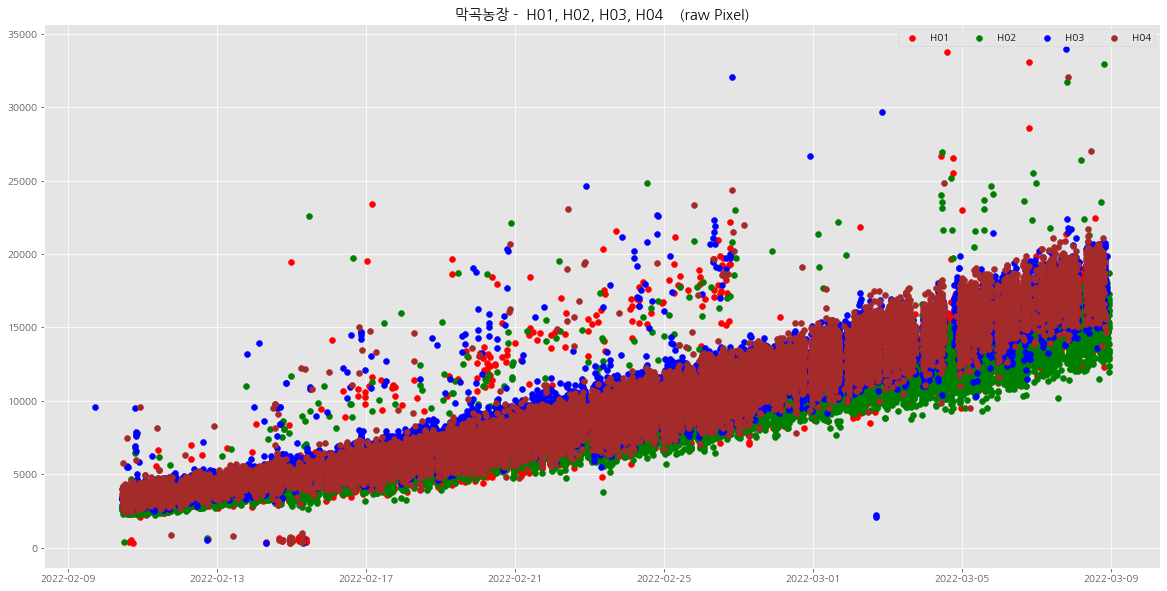

In [27]:
plt.figure(figsize=(20,10))
plt.title('막곡농장 -  H01, H02, H03, H04    (raw Pixel)')

plt.scatter(result_df_h01['CREATE_TIME'], result_df_h01['pixel'], color = 'red', label='H01')
plt.scatter(result_df_h02['CREATE_TIME'], result_df_h02['pixel'], color = 'green', label='H02')
plt.scatter(result_df_h03['CREATE_TIME'], result_df_h03['pixel'], color = 'blue', label='H03')
plt.scatter(result_df_h04['CREATE_TIME'], result_df_h04['pixel'], color = 'brown', label='H04')

plt.legend(loc='best', ncol=4)
plt.show()